In [1]:
# import packages
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import itertools
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

# function to import climate scenarios from csv file
def get_climate_sims_file(filepath, filename, row_start, row_end):
    df_combinations = pd.read_csv(filepath + filename)
    df_filter = df_combinations.iloc[row_start:row_end+1]
    list_combinations = df_filter.values.tolist()
    return list_combinations

def import_df_results(filepath, real, dT, dP, dCV, demand, name_add):
    df_results = pd.read_csv(filepath + 'df_results_{}P{}T{}_dCV{}_real{}_demand{}.csv'.format(name_add, dP,dT,dCV,real,demand))
    df_results['Date'] = pd.to_datetime(df_results['Date'])
    df_results['Month'] = df_results['Date'].dt.month
    df_results['Year'] = df_results['Date'].dt.year
    df_results = df_results.set_index('Date')
    return df_results

# function that takes in a monthly dataframe (make sure the index is the date column) and outputs
# an annually averaged df
def convert_monthly_to_annual_water_yr(df, col_name):
    # set index to date
    #df = df.set_index('Date')
    #print(df)
    # add water year column to df
    df['water_year'] = df.index.year + (df.index.month >= 10)

    # get sum of data by water year
    df_water_yr = df.groupby('water_year')[col_name].sum() #mean()
    df_water_yr['date'] = pd.to_datetime(df_water_yr.index, format='%Y') # add date column
    df_water_yr = df_water_yr.set_index('date')# change date col to index
    return df_water_yr

print('import packages')

import packages


In [2]:
# 1. import climate scenarios
# filepath where data is saved
#filepath =
filename = 'climate_scenarios_500_2025-04-02.csv'
climate_combinations = get_climate_sims_file(filepath,filename,0,500)
print(climate_combinations)

[[1956, 5, 110, 1.1, 'Low'], [1956, 1, 120, 1.2, 'High'], [4211, 1, 60, 1.0, 'Baseline'], [3449, 5, 70, 1.0, 'High'], [2770, 3, 110, 1.0, 'High'], [1987, 3, 90, 1.2, 'High'], [1987, 0, 120, 1.0, 'Baseline'], [3515, 1, 110, 1.2, 'Low'], [3574, 4, 110, 1.2, 'High'], [3515, 2, 60, 1.2, 'Low'], [1956, 5, 120, 1.0, 'High'], [3515, 1, 70, 1.1, 'Baseline'], [2770, 1, 70, 1.1, 'Low'], [3449, 5, 110, 1.1, 'High'], [4937, 3, 100, 1.1, 'High'], [1987, 5, 70, 1.1, 'Baseline'], [1987, 0, 110, 1.0, 'High'], [1987, 4, 90, 1.1, 'Low'], [4937, 4, 90, 1.0, 'High'], [4211, 2, 120, 1.2, 'Low'], [1956, 1, 100, 1.2, 'Baseline'], [2770, 3, 60, 1.1, 'High'], [3515, 3, 120, 1.1, 'High'], [4211, 1, 120, 1.0, 'Low'], [4373, 1, 90, 1.2, 'High'], [4373, 3, 70, 1.0, 'High'], [1956, 5, 80, 1.1, 'Baseline'], [4937, 2, 80, 1.0, 'Baseline'], [4373, 4, 110, 1.0, 'Low'], [1987, 3, 70, 1.2, 'Baseline'], [1956, 4, 120, 1.2, 'High'], [1987, 3, 90, 1.0, 'Baseline'], [1987, 1, 60, 1.0, 'Low'], [4211, 5, 110, 1.1, 'Baseline'],

In [3]:
# 2. import results and calculate reliability levels
col_name = ['Urban_Demand_Prior_Rationing', 'Urban_Water_Supply_Deficit_MGD']
name_add = ''
list_annual_data = []
list_df_results = []
list_min_rel = []
# loop through climate scenarios
for combo in climate_combinations:
    print(combo)
    # get results
    df_results = import_df_results(filepath, combo[0], combo[1], combo[2], combo[3], combo[4], name_add)

    # get annual demands and unmet demands
    df_annual = convert_monthly_to_annual_water_yr(df_results, col_name)
    df_annual['reliability'] = (df_annual['Urban_Demand_Prior_Rationing']-df_annual['Urban_Water_Supply_Deficit_MGD']) / df_annual['Urban_Demand_Prior_Rationing'] * 100

    # get minimum annual reliability
    min_rel = df_annual['reliability'].min()

    # add to list
    list_annual_data.append(df_annual)
    list_df_results.append(df_results)
    list_min_rel.append(min_rel)

df_combined_A = pd.concat(list_annual_data)
print(df_combined_A)

[1956, 5, 110, 1.1, 'Low']
[1956, 1, 120, 1.2, 'High']
[4211, 1, 60, 1.0, 'Baseline']
[3449, 5, 70, 1.0, 'High']
[2770, 3, 110, 1.0, 'High']
[1987, 3, 90, 1.2, 'High']
[1987, 0, 120, 1.0, 'Baseline']
[3515, 1, 110, 1.2, 'Low']
[3574, 4, 110, 1.2, 'High']
[3515, 2, 60, 1.2, 'Low']
[1956, 5, 120, 1.0, 'High']
[3515, 1, 70, 1.1, 'Baseline']
[2770, 1, 70, 1.1, 'Low']
[3449, 5, 110, 1.1, 'High']
[4937, 3, 100, 1.1, 'High']
[1987, 5, 70, 1.1, 'Baseline']
[1987, 0, 110, 1.0, 'High']
[1987, 4, 90, 1.1, 'Low']
[4937, 4, 90, 1.0, 'High']
[4211, 2, 120, 1.2, 'Low']
[1956, 1, 100, 1.2, 'Baseline']
[2770, 3, 60, 1.1, 'High']
[3515, 3, 120, 1.1, 'High']
[4211, 1, 120, 1.0, 'Low']
[4373, 1, 90, 1.2, 'High']
[4373, 3, 70, 1.0, 'High']
[1956, 5, 80, 1.1, 'Baseline']
[4937, 2, 80, 1.0, 'Baseline']
[4373, 4, 110, 1.0, 'Low']
[1987, 3, 70, 1.2, 'Baseline']
[1956, 4, 120, 1.2, 'High']
[1987, 3, 90, 1.0, 'Baseline']
[1987, 1, 60, 1.0, 'Low']
[4211, 5, 110, 1.1, 'Baseline']
[2770, 5, 110, 1.1, 'Baseline']
[3

In [5]:
# policy b: rof=0.05, desal first
# 1. import climate scenarios
#filepath =
filename = 'climate_scenarios_500_2025-04-05.csv'
climate_combinations = get_climate_sims_file(filepath,filename,0,500)
print(climate_combinations)

# 2. import results and calculate reliability levels
col_name = ['Urban_Demand_Prior_Rationing', 'Urban_Water_Supply_Deficit_MGD']
list_annual_data_b = []
list_df_results_b = []
list_min_rel_b = []
# loop through climate scenarios
for combo in climate_combinations:
    print(combo)
    # get results
    df_results = import_df_results(filepath, combo[0], combo[1], combo[2], combo[3], combo[4], name_add)

    # get annual demands and unmet demands
    df_annual = convert_monthly_to_annual_water_yr(df_results, col_name)
    df_annual['reliability'] = (df_annual['Urban_Demand_Prior_Rationing']-df_annual['Urban_Water_Supply_Deficit_MGD']) / df_annual['Urban_Demand_Prior_Rationing'] * 100

    # get minimum annual reliability
    min_rel = df_annual['reliability'].min()

    # add to list
    list_annual_data_b.append(df_annual)
    list_df_results_b.append(df_results)
    list_min_rel_b.append(min_rel)

df_combined_B = pd.concat(list_annual_data_b)

[[1956, 5, 110, 1.1, 'Low'], [1956, 1, 120, 1.2, 'High'], [4211, 1, 60, 1.0, 'Baseline'], [3449, 5, 70, 1.0, 'High'], [2770, 3, 110, 1.0, 'High'], [1987, 3, 90, 1.2, 'High'], [1987, 0, 120, 1.0, 'Baseline'], [3515, 1, 110, 1.2, 'Low'], [3574, 4, 110, 1.2, 'High'], [3515, 2, 60, 1.2, 'Low'], [1956, 5, 120, 1.0, 'High'], [3515, 1, 70, 1.1, 'Baseline'], [2770, 1, 70, 1.1, 'Low'], [3449, 5, 110, 1.1, 'High'], [4937, 3, 100, 1.1, 'High'], [1987, 5, 70, 1.1, 'Baseline'], [1987, 0, 110, 1.0, 'High'], [1987, 4, 90, 1.1, 'Low'], [4937, 4, 90, 1.0, 'High'], [4211, 2, 120, 1.2, 'Low'], [1956, 1, 100, 1.2, 'Baseline'], [2770, 3, 60, 1.1, 'High'], [3515, 3, 120, 1.1, 'High'], [4211, 1, 120, 1.0, 'Low'], [4373, 1, 90, 1.2, 'High'], [4373, 3, 70, 1.0, 'High'], [1956, 5, 80, 1.1, 'Baseline'], [4937, 2, 80, 1.0, 'Baseline'], [4373, 4, 110, 1.0, 'Low'], [1987, 3, 70, 1.2, 'Baseline'], [1956, 4, 120, 1.2, 'High'], [1987, 3, 90, 1.0, 'Baseline'], [1987, 1, 60, 1.0, 'Low'], [4211, 5, 110, 1.1, 'Baseline'],

In [6]:
# policy c: rof=0.91, mcasr first
# 1. import climate scenarios
#filepath =
filename = 'climate_scenarios_500_2025-04-08.csv'
climate_combinations = get_climate_sims_file(filepath,filename,0,500)
print(climate_combinations)

# 2. import results and calculate reliability levels
col_name = ['Urban_Demand_Prior_Rationing', 'Urban_Water_Supply_Deficit_MGD']
list_annual_data_c = []
list_df_results_c = []
list_min_rel_c = []
# loop through climate scenarios
for combo in climate_combinations:
    print(combo)
    # get results
    df_results = import_df_results(filepath, combo[0], combo[1], combo[2], combo[3], combo[4], name_add)

    # get annual demands and unmet demands
    df_annual = convert_monthly_to_annual_water_yr(df_results, col_name)
    df_annual['reliability'] = (df_annual['Urban_Demand_Prior_Rationing']-df_annual['Urban_Water_Supply_Deficit_MGD']) / df_annual['Urban_Demand_Prior_Rationing'] * 100

    # get minimum annual reliability
    min_rel = df_annual['reliability'].min()

    # add to list
    list_annual_data_c.append(df_annual)
    list_df_results_c.append(df_results)
    list_min_rel_c.append(min_rel)

df_combined_C = pd.concat(list_annual_data_c)

[[1956, 5, 110, 1.1, 'Low'], [1956, 1, 120, 1.2, 'High'], [4211, 1, 60, 1.0, 'Baseline'], [3449, 5, 70, 1.0, 'High'], [2770, 3, 110, 1.0, 'High'], [1987, 3, 90, 1.2, 'High'], [1987, 0, 120, 1.0, 'Baseline'], [3515, 1, 110, 1.2, 'Low'], [3574, 4, 110, 1.2, 'High'], [3515, 2, 60, 1.2, 'Low'], [1956, 5, 120, 1.0, 'High'], [3515, 1, 70, 1.1, 'Baseline'], [2770, 1, 70, 1.1, 'Low'], [3449, 5, 110, 1.1, 'High'], [4937, 3, 100, 1.1, 'High'], [1987, 5, 70, 1.1, 'Baseline'], [1987, 0, 110, 1.0, 'High'], [1987, 4, 90, 1.1, 'Low'], [4937, 4, 90, 1.0, 'High'], [4211, 2, 120, 1.2, 'Low'], [1956, 1, 100, 1.2, 'Baseline'], [2770, 3, 60, 1.1, 'High'], [3515, 3, 120, 1.1, 'High'], [4211, 1, 120, 1.0, 'Low'], [4373, 1, 90, 1.2, 'High'], [4373, 3, 70, 1.0, 'High'], [1956, 5, 80, 1.1, 'Baseline'], [4937, 2, 80, 1.0, 'Baseline'], [4373, 4, 110, 1.0, 'Low'], [1987, 3, 70, 1.2, 'Baseline'], [1956, 4, 120, 1.2, 'High'], [1987, 3, 90, 1.0, 'Baseline'], [1987, 1, 60, 1.0, 'Low'], [4211, 5, 110, 1.1, 'Baseline'],

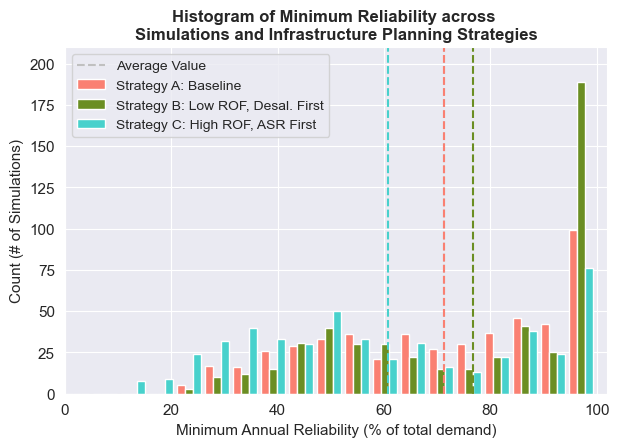

In [8]:
# second version of histogram with bins next to each other
plt.figure(figsize=(7, 4.5))
# Define shared bins
bins = np.linspace(0, 100, 20)  # 15 bins from 0 to 100

# Compute histogram counts
countsA, bin_edges = np.histogram(list_min_rel, bins=bins)
countsB, _ = np.histogram(list_min_rel_b, bins=bins)
countsC, _ = np.histogram(list_min_rel_c, bins=bins)

# Define bar width for side-by-side placement
width = (bins[1] - bins[0]) / 3.5  # Adjust for spacing

# Plot histograms using plt.bar()
plt.bar(bin_edges[:-1], countsA, width=width, label="Strategy A: Baseline", color="salmon", align="edge")
plt.bar(bin_edges[:-1] + width, countsB, width=width, label="Strategy B: Low ROF, Desal. First", color="olivedrab", align="edge")
plt.bar(bin_edges[:-1] + 2*width, countsC, width=width, label="Strategy C: High ROF, ASR First", color="mediumturquoise", align="edge")

# plot average values
plt.plot([np.mean(list_min_rel), np.mean(list_min_rel)], [0, 210], color='silver', linestyle='--', label='Average Value')
plt.plot([np.mean(list_min_rel), np.mean(list_min_rel)], [0, 210], color='salmon', linestyle='--') # , label='Strategy A Average'
plt.plot([np.mean(list_min_rel_b), np.mean(list_min_rel_b)], [0, 210], color='olivedrab', linestyle='--') # , label='Strategy B Average'
plt.plot([np.mean(list_min_rel_c), np.mean(list_min_rel_c)], [0, 210], color='mediumturquoise', linestyle='--') # , label='Strategy C Average'

plt.xticks(np.arange(0, 101, 20), np.arange(0,101,20), fontsize=11)
plt.yticks(np.arange(0, 201, 25), np.arange(0,201, 25), fontsize=11)
plt.xlim(0, 102)
plt.ylim(0, 210)
plt.xlabel('Minimum Annual Reliability (% of total demand)', fontsize=11)
plt.ylabel('Count (# of Simulations)', fontsize=11)
plt.title('Histogram of Minimum Reliability across \nSimulations and Infrastructure Planning Strategies', fontsize=12, fontweight='bold')
plt.legend()

plt.savefig('../../outputs/SI_Histogram_Reliability.png')
plt.show()


In [23]:
# print mean min reliability levels
print('policy A: {}'.format(np.mean(list_min_rel)))
print('policy B: {}'.format(np.mean(list_min_rel_b)))
print('policy C: {}'.format(np.mean(list_min_rel_c)))

policy A: 71.29106782734758
policy B: 76.71968842240382
policy C: 60.84532307020463


In [9]:
# going back to the baseline policy- look at climate impacts for supplies vs demands
# 2. import results and calculate reliability levels
#filepath =
name_add = ''
col_name = ['Tait_div_well_NCR_to_GHWTP_MGD', 'Urban_Demand_Prior_Rationing', 'water_supplies'] # 'LL_to_GHWTP_MGD', 'Tait_div_to_GHWTP_MGD'
list_monthly_data = []
list_df_results = []
df = pd.DataFrame(columns = ['Tait_div_well_NCR_to_GHWTP_MGD', 'Urban_Demand_Prior_Rationing', 'water_supplies', 'real', 'dT', 'dP', 'dCV', 'demand'])
# loop through climate scenarios
for combo in climate_combinations:
    print(combo)
    # get results
    df_results = import_df_results(filepath, combo[0], combo[1], combo[2], combo[3], combo[4], name_add)
    df_results['water_supplies'] = df_results['Tait_div_well_NCR_to_GHWTP_MGD']# + df_results['Tait_div_to_GHWTP_MGD']
    df_subset = df_results[col_name]
    
    # resample to monthly
    df_monthly = df_subset.resample('ME').sum()
    df_monthly['real'] = combo[0]
    df_monthly['dT'] = combo[1]
    df_monthly['dP'] = combo[2]
    df_monthly['dCV'] = combo[3]
    df_monthly['demand'] = combo[4]

    # add to list and df
    list_df_results.append(df_results)
    list_monthly_data.append(df_monthly)
    df = pd.concat([df, df_monthly], ignore_index=True)

# convert df to numpy
arr_data = df.to_numpy()

[1956, 5, 110, 1.1, 'Low']
[1956, 1, 120, 1.2, 'High']
[4211, 1, 60, 1.0, 'Baseline']
[3449, 5, 70, 1.0, 'High']
[2770, 3, 110, 1.0, 'High']
[1987, 3, 90, 1.2, 'High']
[1987, 0, 120, 1.0, 'Baseline']
[3515, 1, 110, 1.2, 'Low']
[3574, 4, 110, 1.2, 'High']
[3515, 2, 60, 1.2, 'Low']
[1956, 5, 120, 1.0, 'High']
[3515, 1, 70, 1.1, 'Baseline']
[2770, 1, 70, 1.1, 'Low']
[3449, 5, 110, 1.1, 'High']
[4937, 3, 100, 1.1, 'High']
[1987, 5, 70, 1.1, 'Baseline']
[1987, 0, 110, 1.0, 'High']
[1987, 4, 90, 1.1, 'Low']
[4937, 4, 90, 1.0, 'High']
[4211, 2, 120, 1.2, 'Low']
[1956, 1, 100, 1.2, 'Baseline']
[2770, 3, 60, 1.1, 'High']
[3515, 3, 120, 1.1, 'High']
[4211, 1, 120, 1.0, 'Low']
[4373, 1, 90, 1.2, 'High']
[4373, 3, 70, 1.0, 'High']
[1956, 5, 80, 1.1, 'Baseline']
[4937, 2, 80, 1.0, 'Baseline']
[4373, 4, 110, 1.0, 'Low']
[1987, 3, 70, 1.2, 'Baseline']
[1956, 4, 120, 1.2, 'High']
[1987, 3, 90, 1.0, 'Baseline']
[1987, 1, 60, 1.0, 'Low']
[4211, 5, 110, 1.1, 'Baseline']
[2770, 5, 110, 1.1, 'Baseline']
[3

In [10]:
# import current conditions data
# 2. import results and calculate reliability levels
col_name = ['Tait_div_well_NCR_to_GHWTP_MGD', 'Urban_Demand_Prior_Rationing', 'water_supplies'] # 'LL_to_GHWTP_MGD', 'Tait_div_to_GHWTP_MGD',
list_monthly_data = []
list_df_results = []
df_hist = pd.DataFrame(columns = ['Tait_div_well_NCR_to_GHWTP_MGD', 'Urban_Demand_Prior_Rationing', 'water_supplies', 'real', 'dT', 'dP', 'dCV', 'demand']) # 'LL_to_GHWTP_MGD', 'Tait_div_to_GHWTP_MGD'

# get historical combinations
real_All = [1270, 1956, 1987, 2770, 3449, 3515, 3574, 4211, 4373, 4937] 
dT_All = [0, 1]
dP_All = [100]
dCV_All = ['1.0']
demand_All = ['Baseline']
name_add = 'NoInf_'
hist_combinations = list(itertools.product(real_All, dT_All, dP_All, dCV_All, demand_All))

#filepath =
# loop through climate scenarios
for combo in hist_combinations:
    print(combo)
    # get results
    df_results = import_df_results(filepath, combo[0], combo[1], combo[2], combo[3], combo[4], name_add)
    df_results['water_supplies'] = df_results['Tait_div_well_NCR_to_GHWTP_MGD'] #['LL_to_GHWTP_MGD'] + df_results['Tait_div_to_GHWTP_MGD']
    df_subset = df_results[col_name]
    
    # resample to monthly
    df_monthly = df_subset.resample('ME').sum()
    df_monthly['real'] = combo[0]
    df_monthly['dT'] = combo[1]
    df_monthly['dP'] = combo[2]
    df_monthly['dCV'] = combo[3]
    df_monthly['demand'] = combo[4]

    # add to list and df
    list_df_results.append(df_results)
    list_monthly_data.append(df_monthly)
    df_hist = pd.concat([df_hist, df_monthly], ignore_index=True)

arr_data_current = df_hist.to_numpy()

(1270, 0, 100, '1.0', 'Baseline')
(1270, 1, 100, '1.0', 'Baseline')
(1956, 0, 100, '1.0', 'Baseline')
(1956, 1, 100, '1.0', 'Baseline')
(1987, 0, 100, '1.0', 'Baseline')
(1987, 1, 100, '1.0', 'Baseline')
(2770, 0, 100, '1.0', 'Baseline')
(2770, 1, 100, '1.0', 'Baseline')
(3449, 0, 100, '1.0', 'Baseline')
(3449, 1, 100, '1.0', 'Baseline')
(3515, 0, 100, '1.0', 'Baseline')
(3515, 1, 100, '1.0', 'Baseline')
(3574, 0, 100, '1.0', 'Baseline')
(3574, 1, 100, '1.0', 'Baseline')
(4211, 0, 100, '1.0', 'Baseline')
(4211, 1, 100, '1.0', 'Baseline')
(4373, 0, 100, '1.0', 'Baseline')
(4373, 1, 100, '1.0', 'Baseline')
(4937, 0, 100, '1.0', 'Baseline')
(4937, 1, 100, '1.0', 'Baseline')


In [11]:
# convert df to array
arr_data = df.to_numpy()
print(arr_data)

[[151.17744478095804 228.39899564944616 151.17744478095804 ... 110 1.1
  'Low']
 [196.03962388535055 219.33817761881457 196.03962388535055 ... 110 1.1
  'Low']
 [103.23819124034965 185.65070539939566 103.23819124034965 ... 110 1.1
  'Low']
 ...
 [265.1158216408683 265.1158216408683 265.1158216408683 ... 110 1.2
  'Baseline']
 [268.5702964154072 269.6627085052215 268.5702964154072 ... 110 1.2
  'Baseline']
 [251.62324358853022 251.62324358853022 251.62324358853022 ... 110 1.2
  'Baseline']]


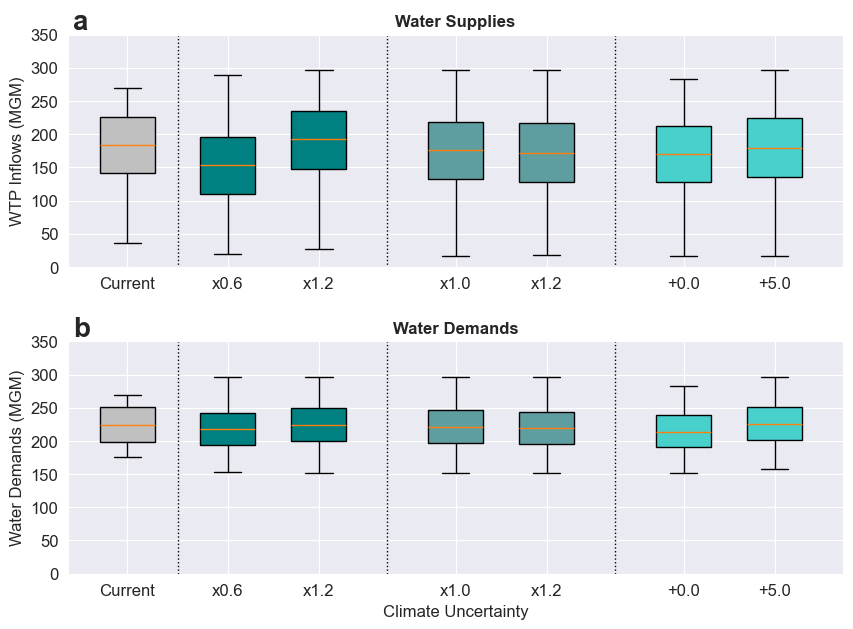

In [12]:
# create a version of the bar plots (or boxplots) looking at water supplies and demands
fig = plt.figure(figsize=(10, 7))
# set up subplots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1], hspace=0.32)
x_axis = np.array([-1.1, 0, 1, 2.5, 3.5, 5, 6]) # , 7.5, 8.5
scenario_list_labels = ['Current', 'x0.6', 'x1.2', 'x1.0', 'x1.2', '+0.0', '+5.0']

### SUPPLIES ###
coln = 2 # 1 = demand # 2 = supply
data_values = arr_data[:,coln]
list_arrs = []
scenario_list = []

# current conditions
list_arrs.append(arr_data_current[:,coln])
scenario_list.append('Current')

# precipitation scenarios
selected_precip = [60, 120]
for dP_group in selected_precip:
    mask = arr_data[:,5] == dP_group # boolean mask for demand type
    dP_vals = data_values[mask]   # Select values for the group
    list_arrs.append(dP_vals)     # Append as a NumPy array
    scenario_list.append(dP_group) # Store the demand type

# CV scenarios
selected_CV = [1.0, 1.2]
for dCV_group in selected_CV:
    mask = arr_data[:,6] == dCV_group # boolean mask for demand type
    dCV_vals = data_values[mask]   # Select values for the group
    list_arrs.append(dCV_vals)     # Append as a NumPy array
    scenario_list.append(dCV_group) # Store the demand type
    
# Temperature scenarios
selected_T = [0, 5]
for dT_group in selected_T:
    mask = arr_data[:,4] == dT_group # boolean mask for demand type
    dT_vals = data_values[mask]   # Select values for the group
    list_arrs.append(dT_vals)     # Append as a NumPy array
    scenario_list.append(dT_group) # Store the demand type
    
# boxplot
ax0 = fig.add_subplot(gs[0, 0])
box = ax0.boxplot(list_arrs, positions=x_axis, widths=0.6, patch_artist=True, showfliers=False)

# Customize colors
colors = ['silver', 'teal', 'teal', 'cadetblue', 'cadetblue', 'mediumturquoise', 'mediumturquoise', 'paleturquoise', 'paleturquoise']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
# add plot labels/limits
ax0.set_xticks(x_axis, scenario_list_labels, fontsize=12)
#ax0.set_xlabel('Climate Uncertainty', fontsize=12)
ax0.set_ylabel('WTP Inflows (MGM)', fontsize=12)
ax0.set_xlim(-1.75, 6.75)
y_max = 350
ax0.set_ylim(0, y_max)
ax0.set_yticks(np.arange(0, y_max+1, 50), np.arange(0, y_max+1, 50), fontsize=12)
ax0.set_title('Water Supplies', fontsize=12, fontweight='bold')

# add lines
lw = 1
line_color = 'k'
ax0.plot([-0.55, -0.55], [-1, y_max], color=line_color, linewidth=lw, linestyle=':')
ax0.plot([1.75, 1.75], [-1, y_max], color=line_color, linewidth=lw, linestyle=':')
ax0.plot([4.25, 4.25], [-1, y_max], color=line_color, linewidth=lw, linestyle=':')

### DEMANDS ###
coln = 1 # 1 = demand, 2 = supply
data_values = arr_data[:,coln]
list_arrs = []

# current conditions
list_arrs.append(arr_data_current[:,coln])

# precipitation scenarios
selected_precip = [60, 120]
for dP_group in selected_precip:
    mask = arr_data[:,5] == dP_group # boolean mask for demand type
    dP_vals = data_values[mask]   # Select values for the group
    list_arrs.append(dP_vals)     # Append as a NumPy array

# CV scenarios
selected_CV = [1.0, 1.2]
for dCV_group in selected_CV:
    mask = arr_data[:,6] == dCV_group # boolean mask for demand type
    dCV_vals = data_values[mask]   # Select values for the group
    list_arrs.append(dCV_vals)     # Append as a NumPy array
    
# Temperature scenarios
selected_T = [0, 5]
for dT_group in selected_T:
    mask = arr_data[:,4] == dT_group # boolean mask for demand type
    dT_vals = data_values[mask]   # Select values for the group
    list_arrs.append(dT_vals)     # Append as a NumPy array
    
# boxplot
ax1 = fig.add_subplot(gs[1, 0])
box = ax1.boxplot(list_arrs, positions=x_axis, widths=0.6, patch_artist=True, showfliers=False)

# Customize colors
colors = ['silver', 'teal', 'teal', 'cadetblue', 'cadetblue', 'mediumturquoise', 'mediumturquoise', 'paleturquoise', 'paleturquoise']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
# add plot labels/limits
ax1.set_xticks(x_axis, scenario_list_labels, fontsize=12)
ax1.set_xlabel('Climate Uncertainty', fontsize=12)
ax1.set_ylabel('Water Demands (MGM)', fontsize=12)
ax1.set_xlim(-1.75, 6.75)
ax1.set_ylim(0, y_max)
ax1.set_yticks(np.arange(0, y_max+1, 50), np.arange(0, y_max+1, 50), fontsize=12)

# add lines
lw = 1
line_color = 'k'
ax1.plot([-0.55, -0.55], [-1, y_max], color=line_color, linewidth=lw, linestyle=':')
ax1.plot([1.75, 1.75], [-1, y_max], color=line_color, linewidth=lw, linestyle=':')
ax1.plot([4.25, 4.25], [-1, y_max], color=line_color, linewidth=lw, linestyle=':')
ax1.set_title('Water Demands', fontsize=12, fontweight='bold')

# add subplot labels
ax1.text(-1.7, y_max*2+120, 'a', fontsize=20, fontweight='bold')
ax1.text(-1.7, y_max+8, 'b', fontsize=20, fontweight='bold')
plt.savefig('../../outputs/Boxplots_climate_sensitivities_SuppliesDemands.png', dpi=300, bbox_inches='tight')
plt.show()